Requirements:

- Python 3.5 (2.7) 
- numpy
- scipy
- pandas
- matplotlib
- seaborn
- pyspark


**First Part: Python and Numpy Introduction**

**Python is a high-level, interpreted, interactive and object-oriented scripting language.** Python is designed to be highly readable. It uses English keywords frequently where as other languages use punctuation, and it has fewer syntactical constructions than other languages.

**Python is Interpreted**: Python is processed at runtime by the interpreter. You do not need to compile your program before executing it. This is similar to PERL and PHP.

**Python is Interactive**: You can actually sit at a Python prompt and interact with the interpreter directly to write your programs.

**Python is Object-Oriented**: Python supports Object-Oriented style or technique of programming that encapsulates code within objects.

In [3]:
a = [1,'ciao',3,4]
for i in a:
    print(i)

1
ciao
3
4


In [4]:
def fib(n):
    a, b = 0, 1
    for _ in xrange(n):
        yield a
        a, b = b, a + b
        
print list(fib(10))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


**NumPy** is the fundamental package for scientific computing with Python. It contains among other things:

- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

http://www.numpy.org

In [5]:
import numpy as np

In [20]:
a = np.arange(15)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [28]:
a = np.arange(15).reshape(1,15).reshape(3,5)
print(a.shape)

(3, 5)


In [23]:
a.shape

(15, 1)

In [24]:
a.ndim

2

In [25]:
a.dtype.name

'int64'

In [ ]:
type(a)

In [30]:
a1 = [2,3,4]
a = np.array(a1, dtype =int)
print(type(a))

<type 'numpy.ndarray'>


In [32]:
A = np.array( [[1,1],[0,1]] )
B = np.array( [[2,0],[3,4]] )
print(A.shape,B.shape)
print(A+B)
print(A*B)
print(A.dot(B))
print(np.dot(A, B))

((2, 2), (2, 2))
[[3 1]
 [3 5]]
[[2 0]
 [0 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


In [33]:
np.sqrt(B)

array([[ 1.41421356,  0.        ],
       [ 1.73205081,  2.        ]])

In [34]:
def f(x,y):
    return 10*x+y
b = np.fromfunction(f,(5,4),dtype=int)
print(b)

[[ 0  1  2  3]
 [10 11 12 13]
 [20 21 22 23]
 [30 31 32 33]
 [40 41 42 43]]


In [35]:
m = np.argmax(B)
print(m)

3


**Second Part: Spark **

**Apache Spark** is a fast and general engine for large-scale data processing. http://spark.apache.org

Let's instead what we can do with Spark, or better with Pyspark.

Generate an instance a Spark context

In [36]:
sc = SparkContext.getOrCreate()

In [37]:
f = sc.parallelize([1, 2, 3, 4, 5])
f.filter(lambda x: x % 2 == 0).collect()

[2, 4]

In [38]:
f = sc.parallelize([2, 3, 4])
f.map(lambda x: x**2).collect()

[4, 9, 16]

Let's write a simple Word Count example

In [39]:
text_file = sc.textFile("pg201.txt")

In [40]:
text_file.flatMap(lambda line: line.split()).collect()

[u'The',
 u'Project',
 u'Gutenberg',
 u'EBook',
 u'of',
 u'Flatland:',
 u'A',
 u'Romance',
 u'of',
 u'Many',
 u'Dimensions',
 u'(Illustrated),',
 u'by',
 u'Edwin',
 u'A.',
 u'Abbot',
 u'This',
 u'eBook',
 u'is',
 u'for',
 u'the',
 u'use',
 u'of',
 u'anyone',
 u'anywhere',
 u'at',
 u'no',
 u'cost',
 u'and',
 u'with',
 u'almost',
 u'no',
 u'restrictions',
 u'whatsoever.',
 u'You',
 u'may',
 u'copy',
 u'it,',
 u'give',
 u'it',
 u'away',
 u'or',
 u're-use',
 u'it',
 u'under',
 u'the',
 u'terms',
 u'of',
 u'the',
 u'Project',
 u'Gutenberg',
 u'License',
 u'included',
 u'with',
 u'this',
 u'eBook',
 u'or',
 u'online',
 u'at',
 u'www.gutenberg.net',
 u'Title:',
 u'Flatland:',
 u'A',
 u'Romance',
 u'of',
 u'Many',
 u'Dimensions',
 u'(Illustrated)',
 u'Author:',
 u'Edwin',
 u'A.',
 u'Abbot',
 u'Release',
 u'Date:',
 u'March',
 u'10,',
 u'2008',
 u'[EBook',
 u'#201]',
 u'Language:',
 u'English',
 u'***',
 u'START',
 u'OF',
 u'THIS',
 u'PROJECT',
 u'GUTENBERG',
 u'EBOOK',
 u'FLATLAND',
 u'***',
 

In [41]:
text_file.flatMap(lambda line: line.split()).map(lambda word: (word, 1)).collect()

[(u'The', 1),
 (u'Project', 1),
 (u'Gutenberg', 1),
 (u'EBook', 1),
 (u'of', 1),
 (u'Flatland:', 1),
 (u'A', 1),
 (u'Romance', 1),
 (u'of', 1),
 (u'Many', 1),
 (u'Dimensions', 1),
 (u'(Illustrated),', 1),
 (u'by', 1),
 (u'Edwin', 1),
 (u'A.', 1),
 (u'Abbot', 1),
 (u'This', 1),
 (u'eBook', 1),
 (u'is', 1),
 (u'for', 1),
 (u'the', 1),
 (u'use', 1),
 (u'of', 1),
 (u'anyone', 1),
 (u'anywhere', 1),
 (u'at', 1),
 (u'no', 1),
 (u'cost', 1),
 (u'and', 1),
 (u'with', 1),
 (u'almost', 1),
 (u'no', 1),
 (u'restrictions', 1),
 (u'whatsoever.', 1),
 (u'You', 1),
 (u'may', 1),
 (u'copy', 1),
 (u'it,', 1),
 (u'give', 1),
 (u'it', 1),
 (u'away', 1),
 (u'or', 1),
 (u're-use', 1),
 (u'it', 1),
 (u'under', 1),
 (u'the', 1),
 (u'terms', 1),
 (u'of', 1),
 (u'the', 1),
 (u'Project', 1),
 (u'Gutenberg', 1),
 (u'License', 1),
 (u'included', 1),
 (u'with', 1),
 (u'this', 1),
 (u'eBook', 1),
 (u'or', 1),
 (u'online', 1),
 (u'at', 1),
 (u'www.gutenberg.net', 1),
 (u'Title:', 1),
 (u'Flatland:', 1),
 (u'A', 1),


In [42]:
text_file.flatMap(lambda line: line.split()).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a+b).collect()

[(u'voluble', 1),
 (u'(until', 1),
 (u'delusions,', 1),
 (u'inch;', 1),
 (u'desirable', 2),
 (u'all', 148),
 (u'four', 13),
 (u'out-number', 1),
 (u'disguise,', 1),
 (u"friend's", 1),
 (u'consists', 1),
 (u'sound."', 1),
 (u'saved', 1),
 (u'party,', 2),
 (u'up.', 2),
 (u'could;', 1),
 (u'votes', 1),
 (u'pardon', 1),
 (u'granting', 1),
 (u'stored,', 1),
 (u'assigning', 1),
 (u'sweetest', 1),
 (u'seriously', 2),
 (u'larger.', 1),
 (u'Workmen;', 1),
 (u'(viz.', 1),
 (u'slipping', 2),
 (u'"an', 1),
 (u'fifty,', 1),
 (u'fractured,', 1),
 (u'Whereas', 1),
 (u'sinking', 1),
 (u'conjecture', 2),
 (u'otherwise,', 1),
 (u'"Distress', 1),
 (u'fills,', 1),
 (u'void', 1),
 (u'wood,', 1),
 (u'exception', 1),
 (u'Height,', 1),
 (u'clear;', 1),
 (u'every', 55),
 (u'Slaves', 1),
 (u'conception', 3),
 (u'writing,', 2),
 (u'vast', 6),
 (u'"That', 2),
 (u'life?', 1),
 (u'Author,', 1),
 (u'cause', 8),
 (u'conceive', 4),
 (u'unmoved.', 1),
 (u'I--alas,', 1),
 (u'recommend-for-the-purposes-of-feeling-and-bei

In [88]:
### PI example
import random
def inside(p):
    x, y = random.random(), random.random()
    return x*x + y*y < 1

NUM_SAMPLES = 10000000

data = xrange(0, NUM_SAMPLES)
##
# filter(self, f)
# Return a new RDD containing only the elements that satisfy a predicate.
##
count = sc.parallelize(data).filter(inside).count()

"Pi is roughly %f" % (4.0 * count / NUM_SAMPLES)

'Pi is roughly 3.142896'

In [ ]:
from pyspark.mllib.stat import Statistics
A = sc.parallelize(B, 2)
# Compute column summary statistics.
summary = Statistics.colStats(A)
print(summary.mean())  # a dense vector containing the mean value for each column
print(summary.variance())  # a dense vector containing the Variace value for each column
print(summary.numNonzeros()) # number of nonzeros in each column
print(Statistics.corr(A, method="pearson"))

**Third part: Data Visualization with python **

**Matplotlib**

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. 

Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code. 

**Seaborn**

Seaborn is a Python visualization library based on matplotlib. 

It provides a high-level interface for drawing attractive statistical graphics.

http://seaborn.pydata.org

**Basic example**

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_style(style='white')
color = sns.color_palette("Set2", 10)

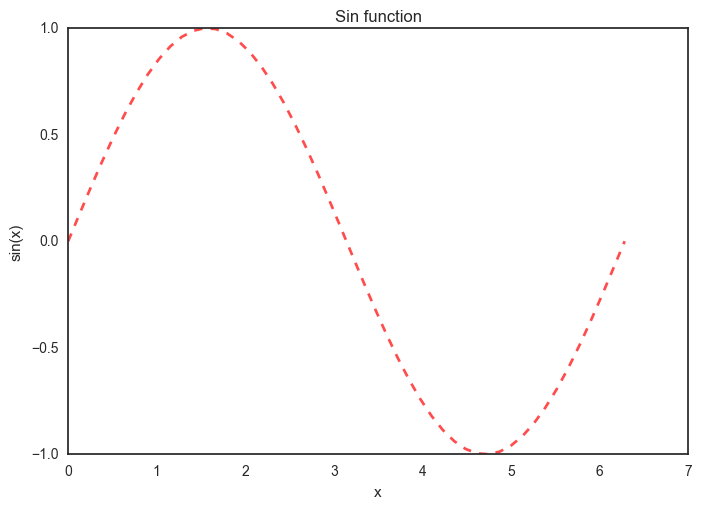

In [58]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
# plt.plot(x,y)

# plt.plot(x,y,linewidth=1.95)
# plt.plot(x,y,linewidth=1.95, alpha=0.7)
# plt.plot(x,y,linewidth=1.95, alpha=0.7,linestyle='--')
# plt.plot(x,y,linewidth=1.95, alpha=0.7,linestyle='--',color='red')
plt.plot(x,y,linewidth=1.95, alpha=0.7,linestyle='--',color='red',label='sin(x)')
plt.ylabel("sin(x)")
plt.xlabel("x")
plt.title("Sin function")

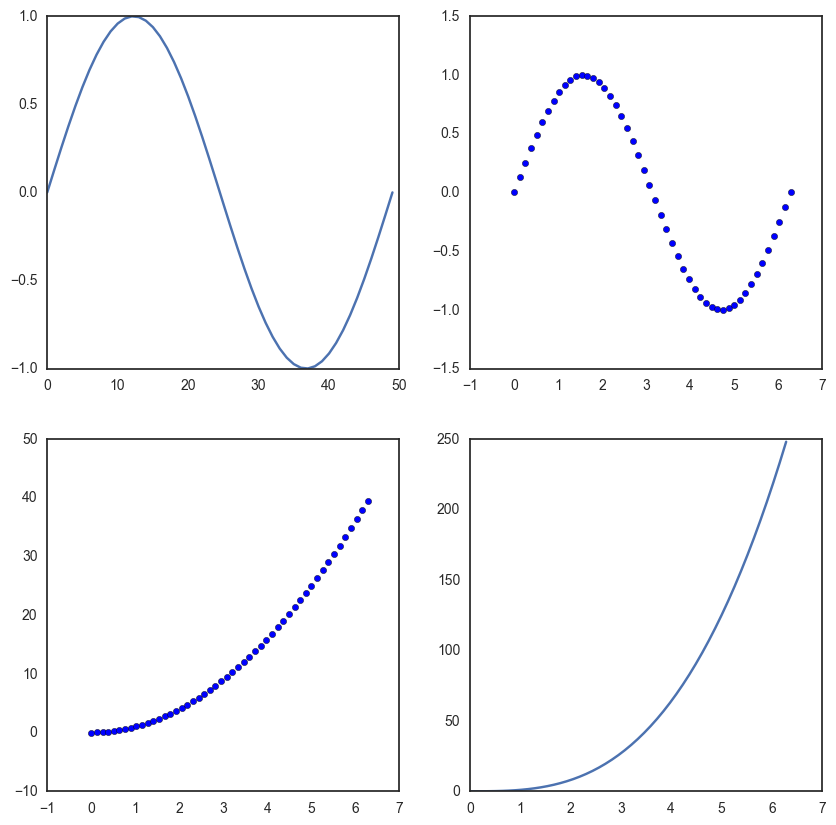

In [60]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(y)
ax2.scatter(x,y)
ax3.scatter(x,x**2)
ax4.plot(x,x**3)

#### SAME IMAGE HIGH RESOLUTION
plt.savefig('path/filename.pdf', format='pdf', dpi=300)


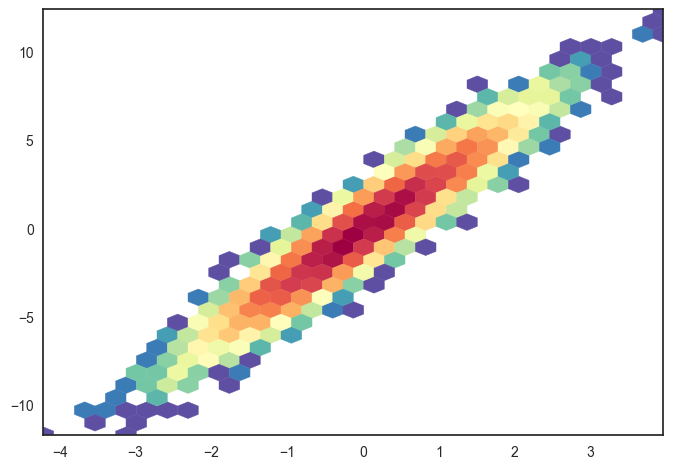

In [63]:
x = np.random.normal(size=10000)
y = x * 3 + np.random.normal(size=10000)

color_map = plt.cm.Spectral_r
plt.hexbin(x,y,cmap=color_map,gridsize=30,mincnt=1,bins='log')
# plt.scatter(x,y)

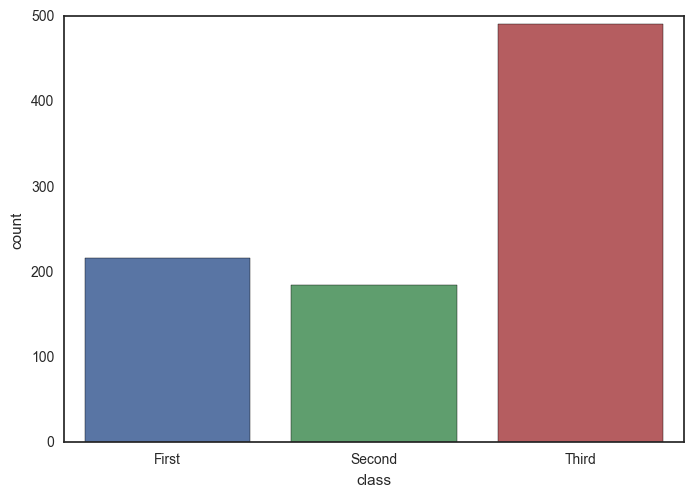

In [70]:
titanic = sns.load_dataset("titanic")
# print(titanic)
ax = sns.countplot(x="class", data=titanic)

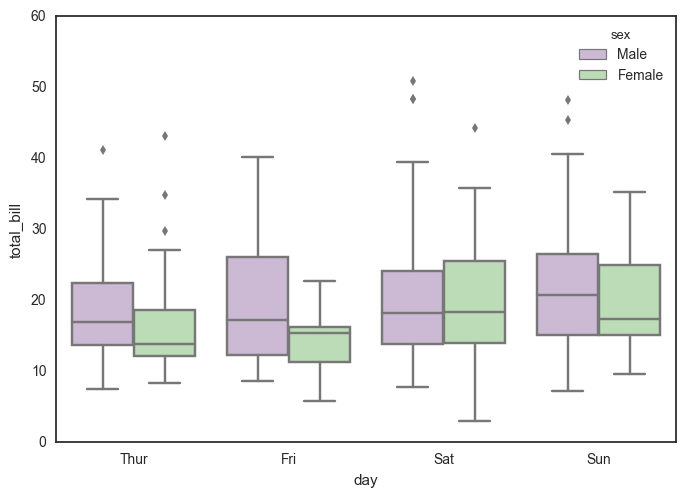

In [73]:
tips = sns.load_dataset("tips")
# print(tips)
# ax = sns.boxplot(x="day", y="total_bill", data=tips)
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")

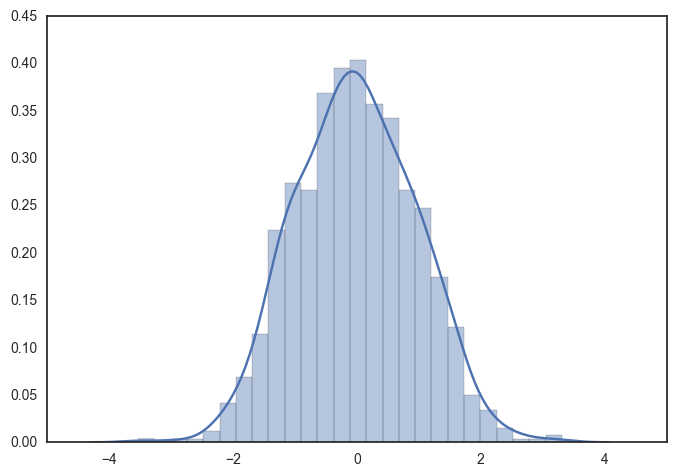

In [77]:
x = np.random.normal(size=1000)
# print(x)
sns.distplot(x)
# sns.distplot(x,kde=False)

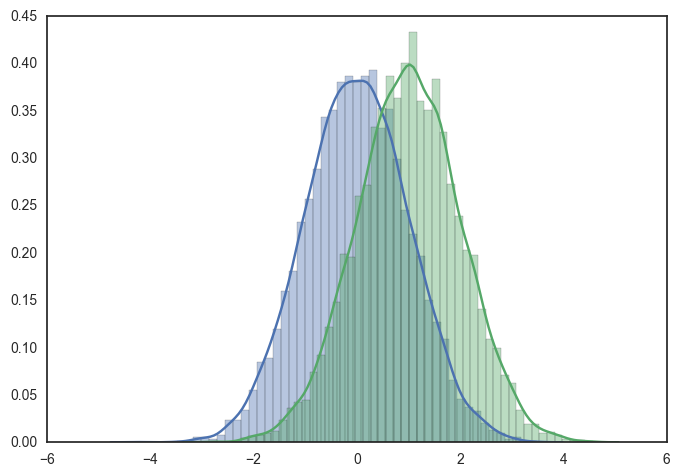

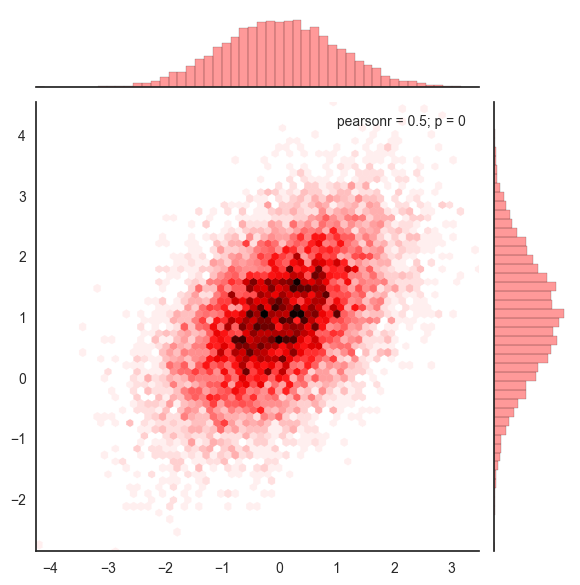

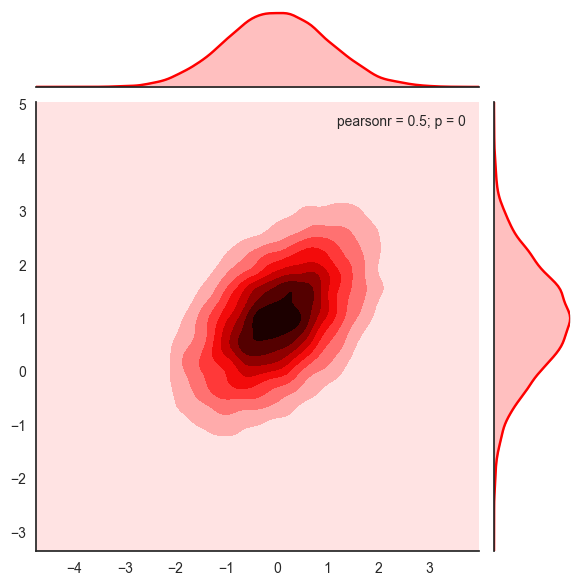

In [79]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
sns.distplot(x)
sns.distplot(y)
sns.jointplot(x=x, y=y, kind="hex", color="r");
sns.jointplot(x=x, y=y, kind="kde", color="r");

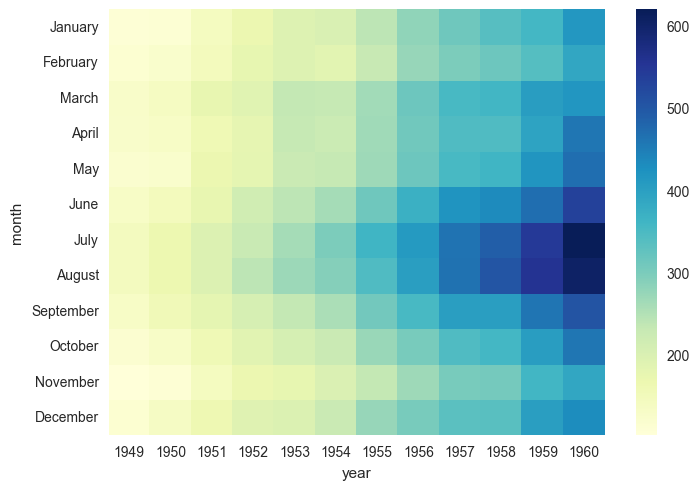

In [84]:
flights = sns.load_dataset("flights")
# print(flights)
flights = flights.pivot("month", "year", "passengers")
# print(flights)
ax = sns.heatmap(flights, cmap="YlGnBu")

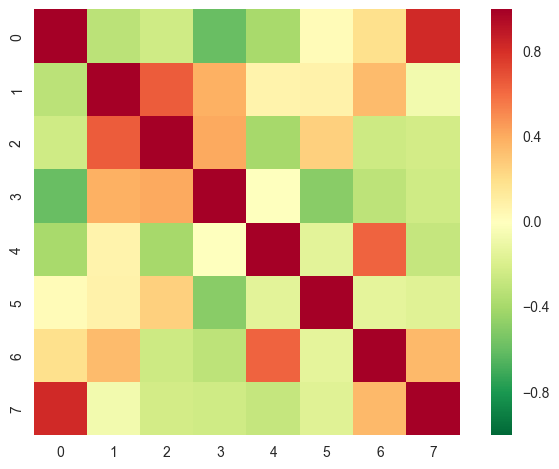

In [85]:
corr = np.corrcoef(np.random.randn(8,8))
# print(corr)
ax = sns.heatmap(corr,cmap='RdYlGn_r',square=True)

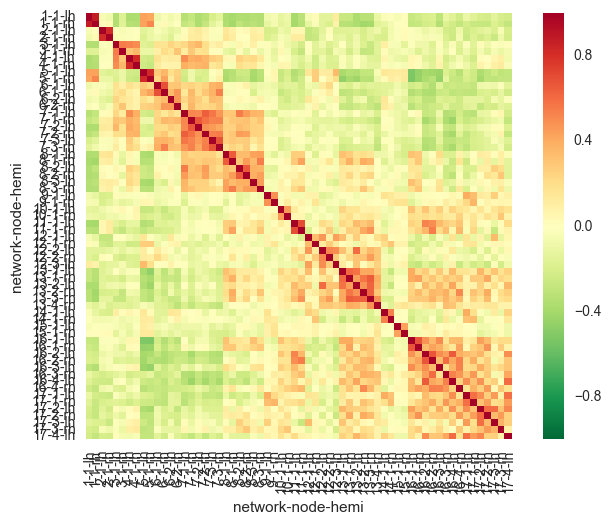

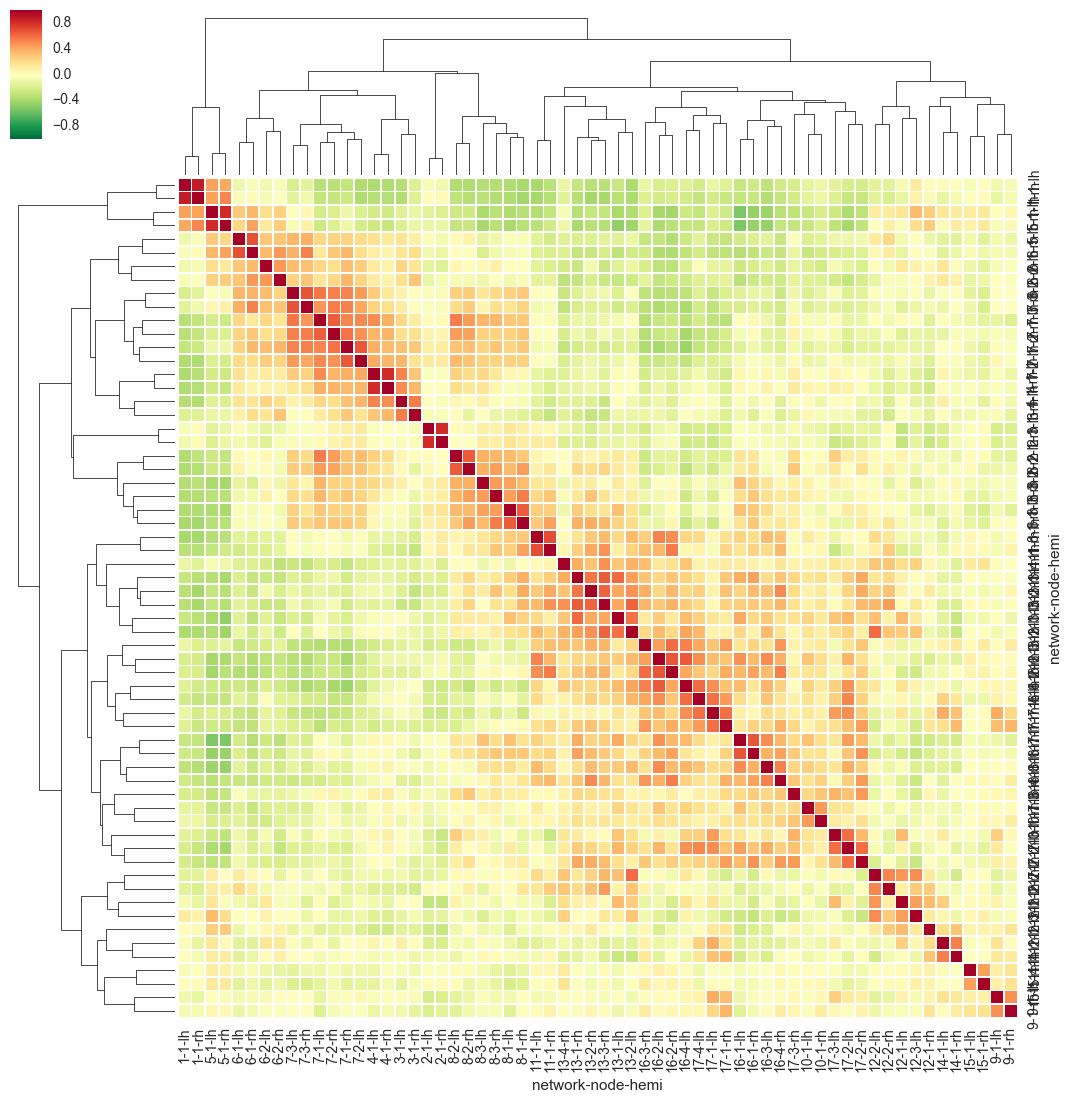

In [86]:
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
sns.heatmap(df.corr(),cmap='RdYlGn_r',square=True)
sns.clustermap(df.corr(),linewidths=.5,figsize=(13, 13), cmap='RdYlGn_r')

More examples:
- http://bokeh.pydata.org/en/latest/
- http://www.hiveplot.com/
- https://d3js.org/

Let's combine **spark** with **matplotlib**

('Number of random points:', 1000000)
('Mean:', array([ -2.11940160e-04,  -9.74029672e-05]))
('stdev:', array([ 0.57704175,  0.57766066]))


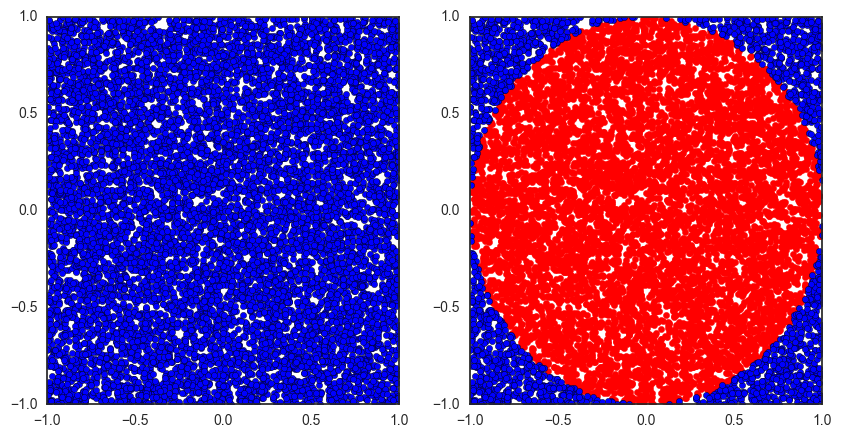

In [87]:
TOTAL = 1000000
dots = sc.parallelize([2.0 * np.random.random(2) - 1.0 for i in range(TOTAL)]).cache()
print("Number of random points:", dots.count())

stats = dots.stats()
print('Mean:', stats.mean())
print('stdev:', stats.stdev())


%matplotlib inline
from operator import itemgetter
from matplotlib import pyplot as plt

plt.figure(figsize = (10, 5))

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

sample = dots.sample(False, 0.01)
X = sample.map(itemgetter(0)).collect()
Y = sample.map(itemgetter(1)).collect()
plt.scatter(X, Y)

# Plot 2
plt.subplot(1, 2, 2)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

inCircle = lambda v: np.linalg.norm(v) <= 1.0
dotsIn = sample.filter(inCircle).cache()
dotsOut = sample.filter(lambda v: not inCircle(v)).cache()

# inside circle
Xin = dotsIn.map(itemgetter(0)).collect()
Yin = dotsIn.map(itemgetter(1)).collect()
plt.scatter(Xin, Yin, color = 'r')

# outside circle
Xout = dotsOut.map(itemgetter(0)).collect()
Yout = dotsOut.map(itemgetter(1)).collect()
plt.scatter(Xout, Yout)